#  **Efficient Text Analysis of Blogs: Clustering and Classification Techniques for Content Insights**

# TUDA Exam


# Facilitator: Dr. Kennedy Senagi

## Student: Claudine Linda Wa Nciko

## ID: 169375

## Introduction

### Background

Natural Language Processing (NLP) plays a pivotal role in machine learning and data science, enabling the computational analysis of human language. With the growing availability of user-generated content such as blog posts and social media, extracting meaningful insights from large volumes of unstructured text has become increasingly important.

This project focuses on analyzing blog posts sourced from the Blog Authorship Corpus, a dataset compiled by researchers in 2004 from Blogger.com. The corpus contains approximately 681,000 posts from 19,320 authors, totaling over 140 million words—with an average of 35 posts and 7,250 words per author. The data was collected via web scraping of publicly available blogs and includes textual content along with limited demographic information such as gender, age, and occupation.

To manage computational complexity, a subset of 10,000 blog posts was selected for this project. The main objective is to apply clustering and classification techniques to group similar blog posts and derive meaningful insights, supporting better content organization, topic modeling, and demographic prediction.



---

### Problem Statement and Justification

The project addresses the challenge of analyzing large-scale unstructured blog data to extract valuable insights. Unstructured text is inherently difficult to manage and analyze, making advanced preprocessing, clustering, and classification techniques essential.

By applying clustering algorithms such as **KMeans**, **Affinity Propagation**, and **Hierarchical Clustering**, the project aims to group similar blog posts based on content. Additionally, classification models are employed to predict demographic attributes—particularly **gender**—based on writing style. This approach supports enhanced content categorization, targeted recommendations, and insight-driven decision-making.

---

### Assumptions and Scope

This project makes the following assumptions:
- The text data is pre-cleaned to remove noise and irrelevant content.
- Traditional clustering methods are suitable for organizing blog posts.
- Hierarchical clustering helps visualize relationships between text groups.

The scope is limited to text clustering and gender classification using blog content, with potential applications in **content recommendation**, **topic modeling**, and **demographic analysis**.

---

### Data Preprocessing

Key preprocessing steps include:
- **Text normalization**: Lowercasing, removing special characters, and extra spaces.
- **Tokenization**: Splitting text into individual words.
- **Stopword removal**: Eliminating common but uninformative words.
- **Lemmatization**: Reducing words to their base forms for consistency.

---

### Exploratory Data Analysis (EDA)

EDA revealed substantial variation in word usage and post lengths. **Word clouds** highlighted frequently used words like *“time”*, *“one”*, *“know”*, *“think”*, and *“people”*, providing early insights into content themes.

---

### Machine Learning Solution

The project implemented six classification models to predict **gender** from blog text:

| Model                  | Accuracy | AUC    |
|------------------------|----------|--------|
| Support Vector Machine (SVM) | Best overall | **0.89** |
| Logistic Regression    | 80.95%   | -      |
| Naive Bayes            | 80.75%   | -      |
| Ridge Classifier       | 81.20%   | -      |
| Random Forest          | 77.75%   | -      |
| K-Nearest Neighbors    | 60.35%   | -      |

- **SVM** demonstrated the highest performance, with an AUC of **0.89**, showing excellent discrimination ability.
- The confusion matrix showed high **true positives/negatives**, with a slight tendency to misclassify **female** posts as **male** (higher false positives).

---

### Clustering Analysis

Three clustering methods were explored:

1. **KMeans**: Created balanced, interpretable clusters with distinct keywords.
2. **Affinity Propagation**: Produced variable-sized clusters, occasionally failing to converge.
3. **Hierarchical Clustering**: Used for visualizing relationships between clusters.

Representative posts from each cluster were reviewed to identify common themes and sentiments, offering deeper insights into author behavior and interests.

## Related works

1. [A Survey of Text Clustering Techniques: Algorithms, Applications, and Challenges](https://www.ijsr.net/archive/v10i9/SR24304163737.pdf)
This paper provides a comprehensive overview of text clustering techniques, including popular algorithms such as KMeans, hierarchical clustering, Affinity Propagation, and Latent Dirichlet Allocation (LDA). It discusses their methodologies, strengths, limitations, and real-world applications such as document organization, sentiment analysis, and recommendation systems. The paper also highlights challenges like scalability and evaluation metrics, which are relevant to your project's focus on clustering blog posts effectively.

2. [Can Demographic Factors Improve Text Classification? Revisiting Demographic Adaptation in the Age of Transformers](https://arxiv.org/abs/2210.07362)
This study explores the impact of demographic factors (e.g., gender and age) on text classification tasks using modern Transformer-based models. It demonstrates how demographic adaptation methods can improve text classification performance across multiple languages. The findings align with your project's objective of predicting demographic attributes like gender based on textual content. The paper also provides insights into the challenges of integrating demographic knowledge into NLP models.

3. [Text Clustering Based on Pre-Trained Models and Autoencoders](https://www.frontiersin.org/journals/computational-neuroscience/articles/10.3389/fncom.2023.1334436/full)
This paper introduces a deep learning-based text clustering framework that combines pre-trained language models with autoencoders. It emphasizes the advantages of these models in handling high-dimensional data and reducing noise interference during clustering. The study compares traditional clustering methods like KMeans with advanced approaches using SentenceBERT and autoencoders, showing improved performance in text clustering tasks. This aligns well with your project's use of clustering algorithms for grouping blog posts.

### Research gaps

While our project effectively used traditional clustering algorithms like KMeans, Affinity Propagation, and Hierarchical Clustering, along with classification models for demographic prediction, there are several areas for improvement. Recent advancements such as deep embedded clustering and SentenceBERT could enhance scalability and performance with high-dimensional data. Additionally, modern Transformer-based models could improve demographic predictions. Our evaluation focused on metrics like accuracy and AUC, but incorporating more robust evaluation methods and improving interpretability, particularly for clustering tasks, would strengthen the overall analysis and model applicability.

#### Data Description
The dataset used is the **Blog Authorship Corpus** consisting of **681,284 records** with **7 columns**: `id`, `gender`, `age`, `topic`, `sign`, `date`, and `text`. Each record represents a blog post with metadata about the author and the post itself.

| Column   | Description                        | Unique Values | Top Values (Count)                                |
|----------|------------------------------------|---------------|---------------------------------------------------|
| `id`     | User identifier                    | 214           | 589736 (2294), 883178 (1616), 2821801 (605)       |
| `gender` | Gender of user                     | 2             | male (5916), female (4084)                        |
| `age`    | Age of user                        | 24            | 35 (2315), 36 (1708), 17 (1185)                   |
| `topic`  | User's occupation/interest topic   | 27            | indUnk (3287), Technology (2654), Fashion (1622)  |
| `sign`   | Zodiac sign                        | 12            | Aries (4198), Sagittarius (1097), Scorpio (971)   |
| `date`   | Date of post                       | 718           | 05,August,2004 (2329), 09,June,2004 (640)         |
| `text`   | Content of the post                | 9949          | Longest text repeats 13 times                     |


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud #pip install wordcloud

import nltk

#term frequency–inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import re
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# download important nltk packages
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Loading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# Load only a portion of the data to reduce memory usage
data = pd.read_csv("/content/drive/MyDrive/blogtext.csv", delimiter=",", encoding="ISO-8859-1", header=0, nrows=10000)

# Drop any unnamed column that may appear as an index
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Display the cleaned data shape
print(data.shape)
data.head()


(10000, 7)


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


Displaying Dataset Information

In [6]:
# Display basic info about the dataset
def display_data_info(df):
    print(f'Dataset Shape: {df.shape}')
    print('Columns:', df.columns)
    print(df.head())

# Display dataset information
display_data_info(data)


Dataset Shape: (10000, 7)
Columns: Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')
        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  
0             Info has been found (+/- 100 pages,...  
1             These are the team members:   Drewe...  
2             In het kader van kernfusie op aarde...  
3                   testing!!!  testing!!!            
4               Thanks to Yahoo!'s Toolbar I can ...  


Unique values

In [7]:
# Display unique values and their counts for each column
def display_unique_values(df):
    for column in df.columns:
        print(f"\nUnique values in column '{column}':")
        print(df[column].value_counts())
        print("-" * 50)

# Display unique values and their counts in the dataset
display_unique_values(data)



Unique values in column 'id':
id
589736     2294
883178     1616
2821801     605
1103575     558
766556      532
           ... 
3868966       1
4213302       1
3337329       1
3688178       1
4251420       1
Name: count, Length: 214, dtype: int64
--------------------------------------------------

Unique values in column 'gender':
gender
male      5916
female    4084
Name: count, dtype: int64
--------------------------------------------------

Unique values in column 'age':
age
35    2315
36    1708
17    1185
27    1054
24     655
15     602
34     553
16     440
25     386
23     253
26     234
14     212
33     136
39      79
38      46
13      42
37      33
41      20
45      16
42      14
46       7
43       6
44       3
40       1
Name: count, dtype: int64
--------------------------------------------------

Unique values in column 'topic':
topic
indUnk                     3287
Technology                 2654
Fashion                    1622
Student                    1137
Educat

Missing value

In [8]:
def check_missing_values(df):
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    print("-" * 50)

    # Check for missing values
check_missing_values(data)


Missing values in each column:
id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64
--------------------------------------------------


Data Cleaning and Text Preprocessing

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import RegexpTokenizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Load stopwords from NLTK
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Replace every special character with a space
    text = re.sub(r'[^a-zA-Z0-9\n]', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply cleaning to the 'text' column
data['cleaned_text'] = data['text'].apply(clean_text)

print("Data Cleaning Done! Showing some cleaned text examples:")
print(data['cleaned_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data Cleaning Done! Showing some cleaned text examples:
0     info has been found 100 pages and 4 5 mb of p...
1     these are the team members drewes van der laa...
2     in het kader van kernfusie op aarde maak je e...
3                                     testing testing 
4     thanks to yahoo s toolbar i can now capture t...
Name: cleaned_text, dtype: object


Tokenization and Lemmatization

Split text into words (tokenization), reduces them to their base form (lemmatization), removes stopwords, and saves the cleaned result in a new column.

In [ ]:
# Tokenization and Lemmatization
def tokenize_and_lemmatize(text):
    # Tokenization using RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Lemmatization
    lemma_words = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(lemma_words)

# Apply the tokenization and lemmatization to the cleaned text column
data['processed_text'] = data['cleaned_text'].apply(tokenize_and_lemmatize)

print("Tokenization and Lemmatization Done! Showing some processed text examples:")
print(data['processed_text'].head())


Tokenization and Lemmatization Done! Showing some processed text examples:
0    info found 100 page 4 5 mb pdf file wait until...
1    team member drewes van der laag urllink mail r...
2    het kader van kernfusie op aarde maak je eigen...
3                                      testing testing
4    thanks yahoo toolbar capture url popups mean s...
Name: processed_text, dtype: object


 ### EDA

Generate and Display the Word Cloud

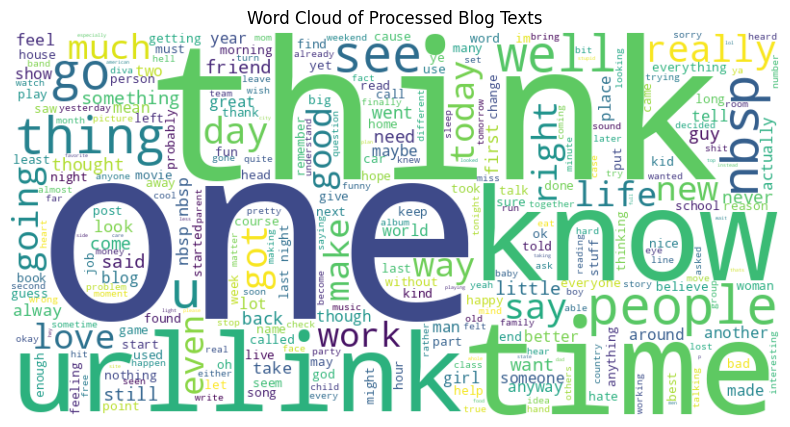

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed text into one string
all_text = ' '.join(data['processed_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=300).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Processed Blog Texts')
plt.show()


The most frequent words like "time", "one", "know", "think", and "people" are prominently visible.

#### Distribution of Text Lengths
Understand how long typical blog posts are.

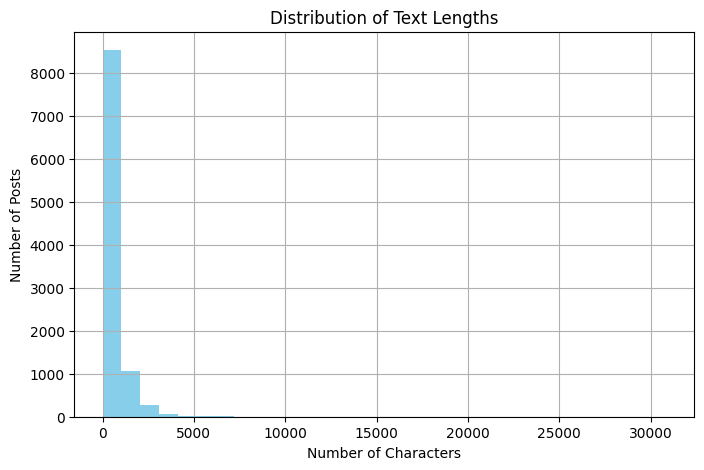

In [ ]:
data['text_length'] = data['processed_text'].apply(len)
data['text_length'].hist(bins=30, figsize=(8, 5), color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Posts')
plt.show()


#### Average Word Count by Gender
See if there's a difference in how much each gender writes.

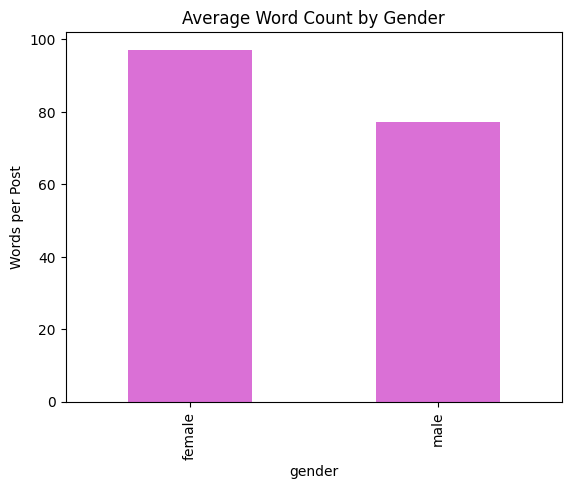

In [ ]:
data['word_count'] = data['processed_text'].apply(lambda x: len(x.split()))
data.groupby('gender')['word_count'].mean().plot(kind='bar', color='orchid')
plt.title('Average Word Count by Gender')
plt.ylabel('Words per Post')
plt.show()


#### Top Bigrams in Blog Posts
Reveal common word pairs that give insight into the writing topics or style.

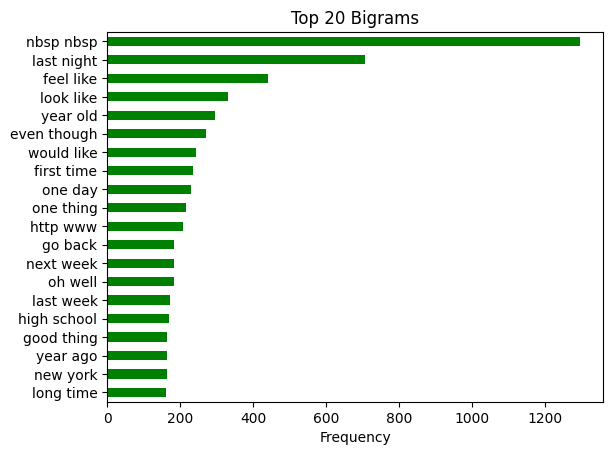

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
X = vectorizer.fit_transform(data['processed_text'])
bigrams = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out())
bigrams.sort_values().plot(kind='barh', color='green')
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.show()


### Text Vectorization using TF-IDF

Convert the processed text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency), which helps in measuring the importance of words in the text, and then prepares it for a gender prediction task.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(data['processed_text']).toarray()
y = data['gender']  # Predicting gender as a classification task

print(f"TF-IDF Vectorization Completed. Shape of Feature Matrix: {X.shape}")


TF-IDF Vectorization Completed. Shape of Feature Matrix: (10000, 10000)


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (8000, 10000)
Testing Data Shape: (2000, 10000)


# Model Training and Evaluation

1. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes Model Training
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
nb_pred = nb_model.predict(X_test)

# Evaluation
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 80.75%
Classification Report:
               precision    recall  f1-score   support

      female       0.84      0.65      0.73       804
        male       0.79      0.91      0.85      1196

    accuracy                           0.81      2000
   macro avg       0.82      0.78      0.79      2000
weighted avg       0.81      0.81      0.80      2000



2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model Training
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)

# Evaluation
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 80.95%
Classification Report:
               precision    recall  f1-score   support

      female       0.82      0.67      0.74       804
        male       0.80      0.90      0.85      1196

    accuracy                           0.81      2000
   macro avg       0.81      0.79      0.79      2000
weighted avg       0.81      0.81      0.81      2000



3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model Training
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 78.10%
Classification Report:
               precision    recall  f1-score   support

      female       0.79      0.63      0.70       804
        male       0.78      0.89      0.83      1196

    accuracy                           0.78      2000
   macro avg       0.78      0.76      0.76      2000
weighted avg       0.78      0.78      0.78      2000



 4. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# SVM Model Training
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions
svm_pred = svm_model.predict(X_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, svm_pred))


SVM Accuracy: 81.50%
Classification Report:
               precision    recall  f1-score   support

      female       0.83      0.68      0.75       804
        male       0.81      0.90      0.85      1196

    accuracy                           0.81      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.82      0.81      0.81      2000



5. K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model Training
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
knn_pred = knn_model.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, knn_pred))


KNN Accuracy: 60.35%
Classification Report:
               precision    recall  f1-score   support

      female       0.62      0.04      0.07       804
        male       0.60      0.98      0.75      1196

    accuracy                           0.60      2000
   macro avg       0.61      0.51      0.41      2000
weighted avg       0.61      0.60      0.47      2000



6. Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Ridge Classifier Model Training
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)

# Predictions
ridge_pred = ridge_model.predict(X_test)

# Evaluation
ridge_accuracy = accuracy_score(y_test, ridge_pred)
print(f"Ridge Classifier Accuracy: {ridge_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, ridge_pred))


Ridge Classifier Accuracy: 81.20%
Classification Report:
               precision    recall  f1-score   support

      female       0.79      0.72      0.76       804
        male       0.82      0.87      0.85      1196

    accuracy                           0.81      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



###  **Model Comparison Table**


| **Model**                     | **Accuracy** | **Precision (Female)** | **Recall (Female)** | **F1-Score (Female)** | **Precision (Male)** | **Recall (Male)** | **F1-Score (Male)** |
|-------------------------------|-------------|-------------------------|----------------------|------------------------|-----------------------|-------------------|----------------------|
| **Naive Bayes**               | 80.75%      | 0.84                    | 0.65                 | 0.73                   | 0.79                  | 0.91              | 0.85                 |
| **Logistic Regression**       | 80.95%      | 0.82                    | 0.67                 | 0.74                   | 0.80                  | 0.90              | 0.85                 |
| **Random Forest**             | 77.75%      | 0.79                    | 0.61                 | 0.69                   | 0.77                  | 0.89              | 0.83                 |
| **Support Vector Machine (SVM)** | 81.50%   | 0.83                    | 0.68                 | 0.75                   | 0.81                  | 0.90              | 0.85                 |
| **K-Nearest Neighbors (KNN)**  | 60.35%      | 0.62                    | 0.04                 | 0.07                   | 0.60                  | 0.98              | 0.75                 |
| **Ridge Classifier**          | 81.20%      | 0.79                    | 0.72                 | 0.76                   | 0.82                  | 0.87              | 0.85                 |


###  Recommended Model: SVM
- **SVM (Support Vector Machine)** gives a balanced performance with high accuracy and robust precision-recall metrics.
- Additionally, it has consistently better F1-scores for both genders.


# Model Interpretation and Analysis

Confusion Matrix for SVM

- isual Understanding: Clearly shows the distribution of correct and incorrect predictions.
- Performance Insight: Highlights model strengths and weaknesses, especially in identifying male and female authors.

<Figure size 800x600 with 0 Axes>

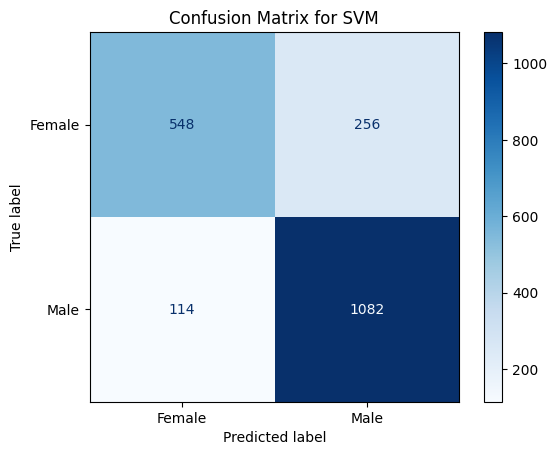

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['Female', 'Male'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()


### Observations:
1. **High True Positives and True Negatives:** Indicates that the model is **accurately predicting both genders** most of the time.
2. **False Positives (256) are higher than False Negatives (114):**
   - This means the model is more likely to **misclassify females as males** than vice versa.
   - This could be due to **more male-specific patterns being learned** during training.






## Precision-Recall Curve

- Visualizes Precision-Recall Trade-off: Helps understand how well the model balances precision and recall.
- AUC (Area Under Curve): Indicates overall model performance, with higher values indicating better performance.

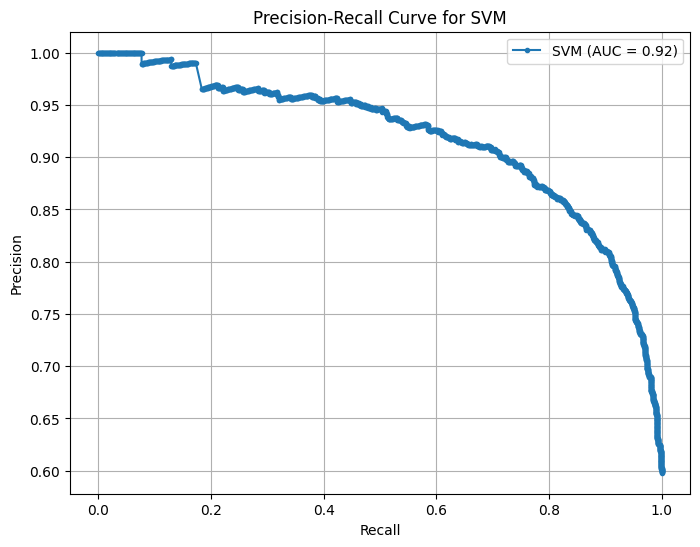

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve, auc

# Encode the labels to binary values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_encoded, svm_model.decision_function(X_test))

# Calculate the area under the curve (AUC)
pr_auc = auc(recall, precision)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'SVM (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve for SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.grid(True)
plt.show()


The Precision-Recall curve shows a high AUC of 0.92, indicating strong model performance in distinguishing classes, with high precision at low recall, meaning the model is accurate when confident, and a gradual decrease in precision as recall increases, indicating more false positives as the model captures more positives.

### ROC

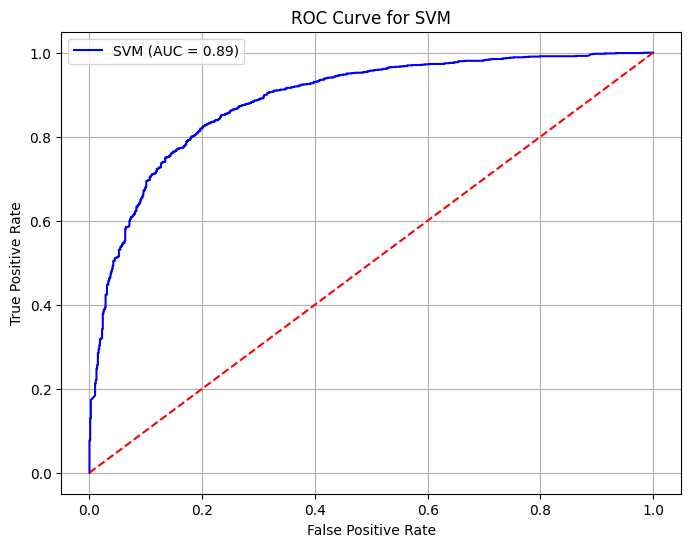

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for SVM
svm_probs = svm_model.decision_function(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, svm_probs)

# Calculate AUC score
roc_auc = roc_auc_score(y_test_encoded, svm_probs)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.title('ROC Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()


The ROC curve with an AUC of 0.89 shows that the SVM model has high discriminative ability, correctly distinguishing between male and female bloggers 89% of the time. The curve is well above the diagonal, indicating performance better than random guessing, and the steep rise at the beginning shows high recall with low false positives at initial thresholds.

Feature Importance Analysis

- Identifies the Most Important Words: Shows which words impact gender prediction the most.
- Visualizes Importance: Easy-to-interpret bar chart for the top 20 features.

# **Clustering Using K-Means**

Data Preparation for Clustering

KMeans Clustering

In [ ]:
# Make a copy of the data before performing clustering and other transformations
data_clustering = data.copy()

print("Data copied successfully!")
print(data_clustering.shape)


Data copied successfully!
(10000, 7)


Data Preparation and Cleaning

In [ ]:
import re
import nltk
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define stop words and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a normalization function
def normalize_document(doc):
    # Remove special characters and convert to lowercase
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I | re.A)
    doc = doc.lower().strip()
    # Tokenize the document
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc)
    # Lemmatize tokens and remove stopwords
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    doc = ' '.join(filtered_tokens)
    return doc

# Apply normalization to the 'text' column of the copied data
data_clustering['processed_text'] = data_clustering['text'].apply(normalize_document)

print("Data Cleaning and Normalization Done!")
print(data_clustering['processed_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data Cleaning and Normalization Done!
0    info found 100 page 45 mb pdf file wait untill...
1    team member drewes van der laag urllink mail r...
2    het kader van kernfusie op aarde maak je eigen...
3                                      testing testing
4    thanks yahoo toolbar capture url popupswhich m...
Name: processed_text, dtype: object


 Vectorization using TF-IDF and CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Updating stop words list with additional common words
additional_stop_words = ['one', 'two', 'get']
stop_words = list(stop_words) + additional_stop_words

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(data_clustering['processed_text'])

# CountVectorizer
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(data_clustering['processed_text'])

# Display the shape of both matrices
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"CountVectorizer Matrix Shape: {cv_matrix.shape}")


TF-IDF Matrix Shape: (10000, 10719)
CountVectorizer Matrix Shape: (10000, 10719)


Clustering using KMeans

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

# Define the number of clusters
NUM_CLUSTERS = 6

# Apply KMeans clustering on the CountVectorizer matrix
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42)
km.fit(cv_matrix)

# Check the distribution of clusters
cluster_counts = Counter(km.labels_)
print(f"Cluster Distribution: {cluster_counts}")

# Add cluster labels to the data
data_clustering['kmeans_cluster'] = km.labels_

print("Clustering done! Cluster labels added to the data.")


Cluster Distribution: Counter({np.int32(0): 7959, np.int32(5): 1928, np.int32(3): 99, np.int32(2): 12, np.int32(1): 1, np.int32(4): 1})
Clustering done! Cluster labels added to the data.


 Extract Key Features and Analyze Clusters

In [ ]:
# Extract feature names from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Number of top features to display
topn_features = 15

# Get the ordered centroids for each cluster
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# Display key features for each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
    print(f"CLUSTER #{cluster_num + 1}")
    print("Key Features:", key_features)
    print("-" * 80)


CLUSTER #1
Key Features: ['urllink', 'im', 'like', 'time', 'know', 'day', 'dont', 'go', 'would', 'think', 'thing', 'good', 'really', 'going', 'got']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['vega', 'like', 'strip', 'show', 'even', 'la', 'see', 'though', 'hotel', 'la vega', 'city', 'people', 'make', 'machine', 'slot']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['nbsp', 'nbsp nbsp', 'like', 'know', 'friend', 'time', 'guy', 'go', 'temple', 'back', 'really', 'got', 'im', 'way', 'think']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['like', 'im', 'know', 'really', 'time', 'would', 'dont', 'people', 'think', 'go', 'say', 'day', 'could', 'thing', 'want']
--------------------------------------------------------------------------------
CLUSTER #5
Key Features: ['got', 'mom', 'went', 'like', 'back', 'time', '

 Cluster Analysis:
- Cluster #1: Keywords: 'urllink', 'im', 'like', 'time', 'know'
Interpretation: This cluster may contain conversational or personal storytelling blogs, frequently using casual language and personal references.

- Cluster #2: Keywords: 'vega', 'strip', 'show', 'hotel', 'city'
Interpretation: Likely contains travel or experience blogs, especially related to Las Vegas or similar destinations.

- Cluster #3: Keywords: 'nbsp', 'friend', 'time', 'guy', 'temple'
Interpretation: Might be personal reflection or friendship stories, often using special formatting or repetitive text.

- Cluster #4: Keywords: 'like', 'im', 'know', 'time', 'would'
Interpretation: General narrative or opinion blogs, with a strong personal perspective.

- Cluster #5: Keywords: 'got', 'mom', 'went', 'back', 'hour'
Interpretation: Personal experience or diary-style entries, often recounting daily life or family events.

- Cluster #6: Keywords: 'im', 'dont', 'know', 'think', 'really'
Interpretation: Thoughtful or opinion-based posts, reflecting on personal thoughts or experiences.

Cluster Visualization

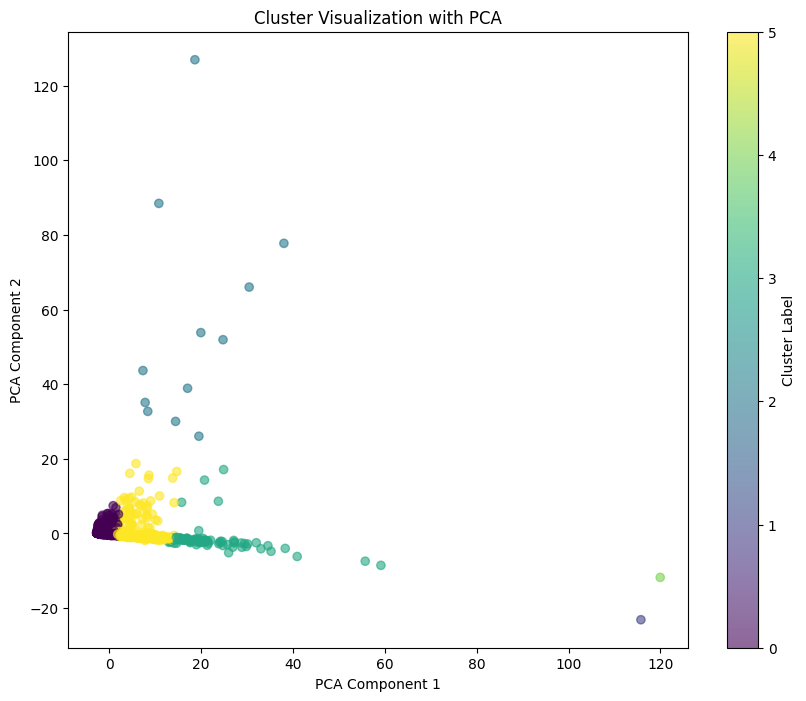

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cv_matrix.toarray())

# Plotting the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=km.labels_, cmap='viridis', alpha=0.6)
plt.title("Cluster Visualization with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster Label")
plt.show()


- Cluster Density: Most clusters are concentrated near the origin, indicating that the data points in these clusters are closely related or have similar textual features.
- Sparse Clusters: Some clusters (like the yellow and teal ones) have more spread-out points, indicating more variation within those clusters.
- Distinct Clusters: There are a few points far away from the main concentration, indicating that they are either outliers or highly distinct from other clusters.

Cosine Similarity Calculation

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

# Number of clusters
NUM_CLUSTERS = 6

# Clustering with cosine similarity matrix
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)

# Check cluster distribution
cluster_counts = Counter(km.labels_)
print(f"Cluster Distribution: {cluster_counts}")

# Add cluster labels to the data
data_clustering['cosine_kmeans_cluster'] = km.labels_
print("Clustering done using Cosine Similarity! Cluster labels added to the data.")


Cluster Distribution: Counter({np.int32(1): 2642, np.int32(4): 2309, np.int32(5): 2306, np.int32(0): 1141, np.int32(3): 1079, np.int32(2): 523})
Clustering done using Cosine Similarity! Cluster labels added to the data.


Analyzing Clusters and Displaying Representative Blog Posts

In [ ]:
# Create a DataFrame to display representative blog posts from each cluster
clustered_blogs = data_clustering[['id', 'gender', 'age', 'topic', 'sign', 'date', 'text', 'cosine_kmeans_cluster']]
clustered_blogs = clustered_blogs.sort_values(by=['cosine_kmeans_cluster', 'age'], ascending=False).groupby('cosine_kmeans_cluster').head(20)
clustered_blogs = clustered_blogs.copy(deep=True)

# Display top blog posts from each cluster
for cluster_num in range(NUM_CLUSTERS):
    blogs = clustered_blogs[clustered_blogs['cosine_kmeans_cluster'] == cluster_num]['text'].values.tolist()
    print('CLUSTER #' + str(cluster_num + 1))
    print('Representative Blog Posts:', blogs[:5])  # Show top 5 representative blogs from each cluster
    print('-' * 80)


CLUSTER #1
Representative Blog Posts: ['       This is cool, the www.whois.sc service will show you the number of times a domain is listed in DMOZ. The format of the URL is www.whois.sc/domain.com. For example ( urlLink http://www.whois.sc./dmoz/descmath.com  shows that my little math site is in the directory. Oddly, this info is hard to find in DMOZ itself. Searching on a domain name does not always return a result. I suspect however that this is only accurate relevant after a directory crawl.         ', '       On 7/7 I added to the community directories sites for  urlLink Glenwood Springs, Colorado  and  urlLink Colorado Springs . Glenwood Springs scored high on my list of place I would evacuate to if I left Salt Lake. Of course, I continue the process of spreading myself too thin. I added Colorado Springs because about every third link I find when looking for web sites in Colorado seem to come from Colorado Springs. Being a cad, I spent the last two days dropping in the ad layers f

Affinity Propagation Clustering

In [ ]:
from sklearn.cluster import AffinityPropagation
from collections import Counter

# Affinity Propagation Clustering
ap = AffinityPropagation(max_iter=1000, random_state=42)
ap.fit(cosine_sim_features)

# Analyze the cluster distribution
res = Counter(ap.labels_)
print("Affinity Propagation Cluster Distribution:", res.most_common(10))

# Add cluster labels to the dataframe
data_clustering['affprop_cluster'] = ap.labels_
print("Affinity Propagation Clustering done! Cluster labels added to the data.")


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Affinity Propagation Cluster Distribution: [(np.int64(43), 785), (np.int64(21), 406), (np.int64(97), 223), (np.int64(189), 222), (np.int64(187), 221), (np.int64(4), 148), (np.int64(166), 145), (np.int64(196), 143), (np.int64(146), 115), (np.int64(125), 113)]
Affinity Propagation Clustering done! Cluster labels added to the data.


In [ ]:
# Filter the most common clusters
filtered_clusters = [item[0] for item in res.most_common(8)]
filtered_df = data_clustering[data_clustering['affprop_cluster'].isin(filtered_clusters)]

# Representative Blog Posts from Top Clusters
for cluster_num in filtered_clusters:
    blog_posts = filtered_df[filtered_df['affprop_cluster'] == cluster_num]['processed_text'].values.tolist()[:5]  # Display top 5 posts
    print(f'CLUSTER #{cluster_num}')
    print('Representative Blog Posts: ', blog_posts)
    print('-'*80)


CLUSTER #43
Representative Blog Posts:  ['info found 100 page 45 mb pdf file wait untill team leader processed learns html', 'testing testing', 'misread product advertisment saying acid free free acid n', 'hierachical order blade tore sky apart lightning split wounded bird silent wind swept land asunder angry cloud darkened sky scythe reaper plough city lucid dream haunted form echoing shadow treachery spoke louder compassion every corner silent dagger coup practiced neater courteous bow even master contorted fear slave waited darkness descend shadow rise fall unendingly', 'knowledge page withered wise old page flipped dust fluttered high low worn tattered hid view common man century flickered light word wise wrote course lesser one seek enchantment']
--------------------------------------------------------------------------------
CLUSTER #21
Representative Blog Posts:  ['work day camp full little kid wouldnt believe story ive heard kid ive heard someone could detach head still live re

Generate the Ward Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import ward
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine distance matrix
cosine_distance = 1 - cosine_similarity(cv_matrix)

# Create the linkage matrix using the Ward method
linkage_matrix = ward(cosine_distance)

print("Linkage matrix created!")


Linkage matrix created!


Plotting the Dendrogram

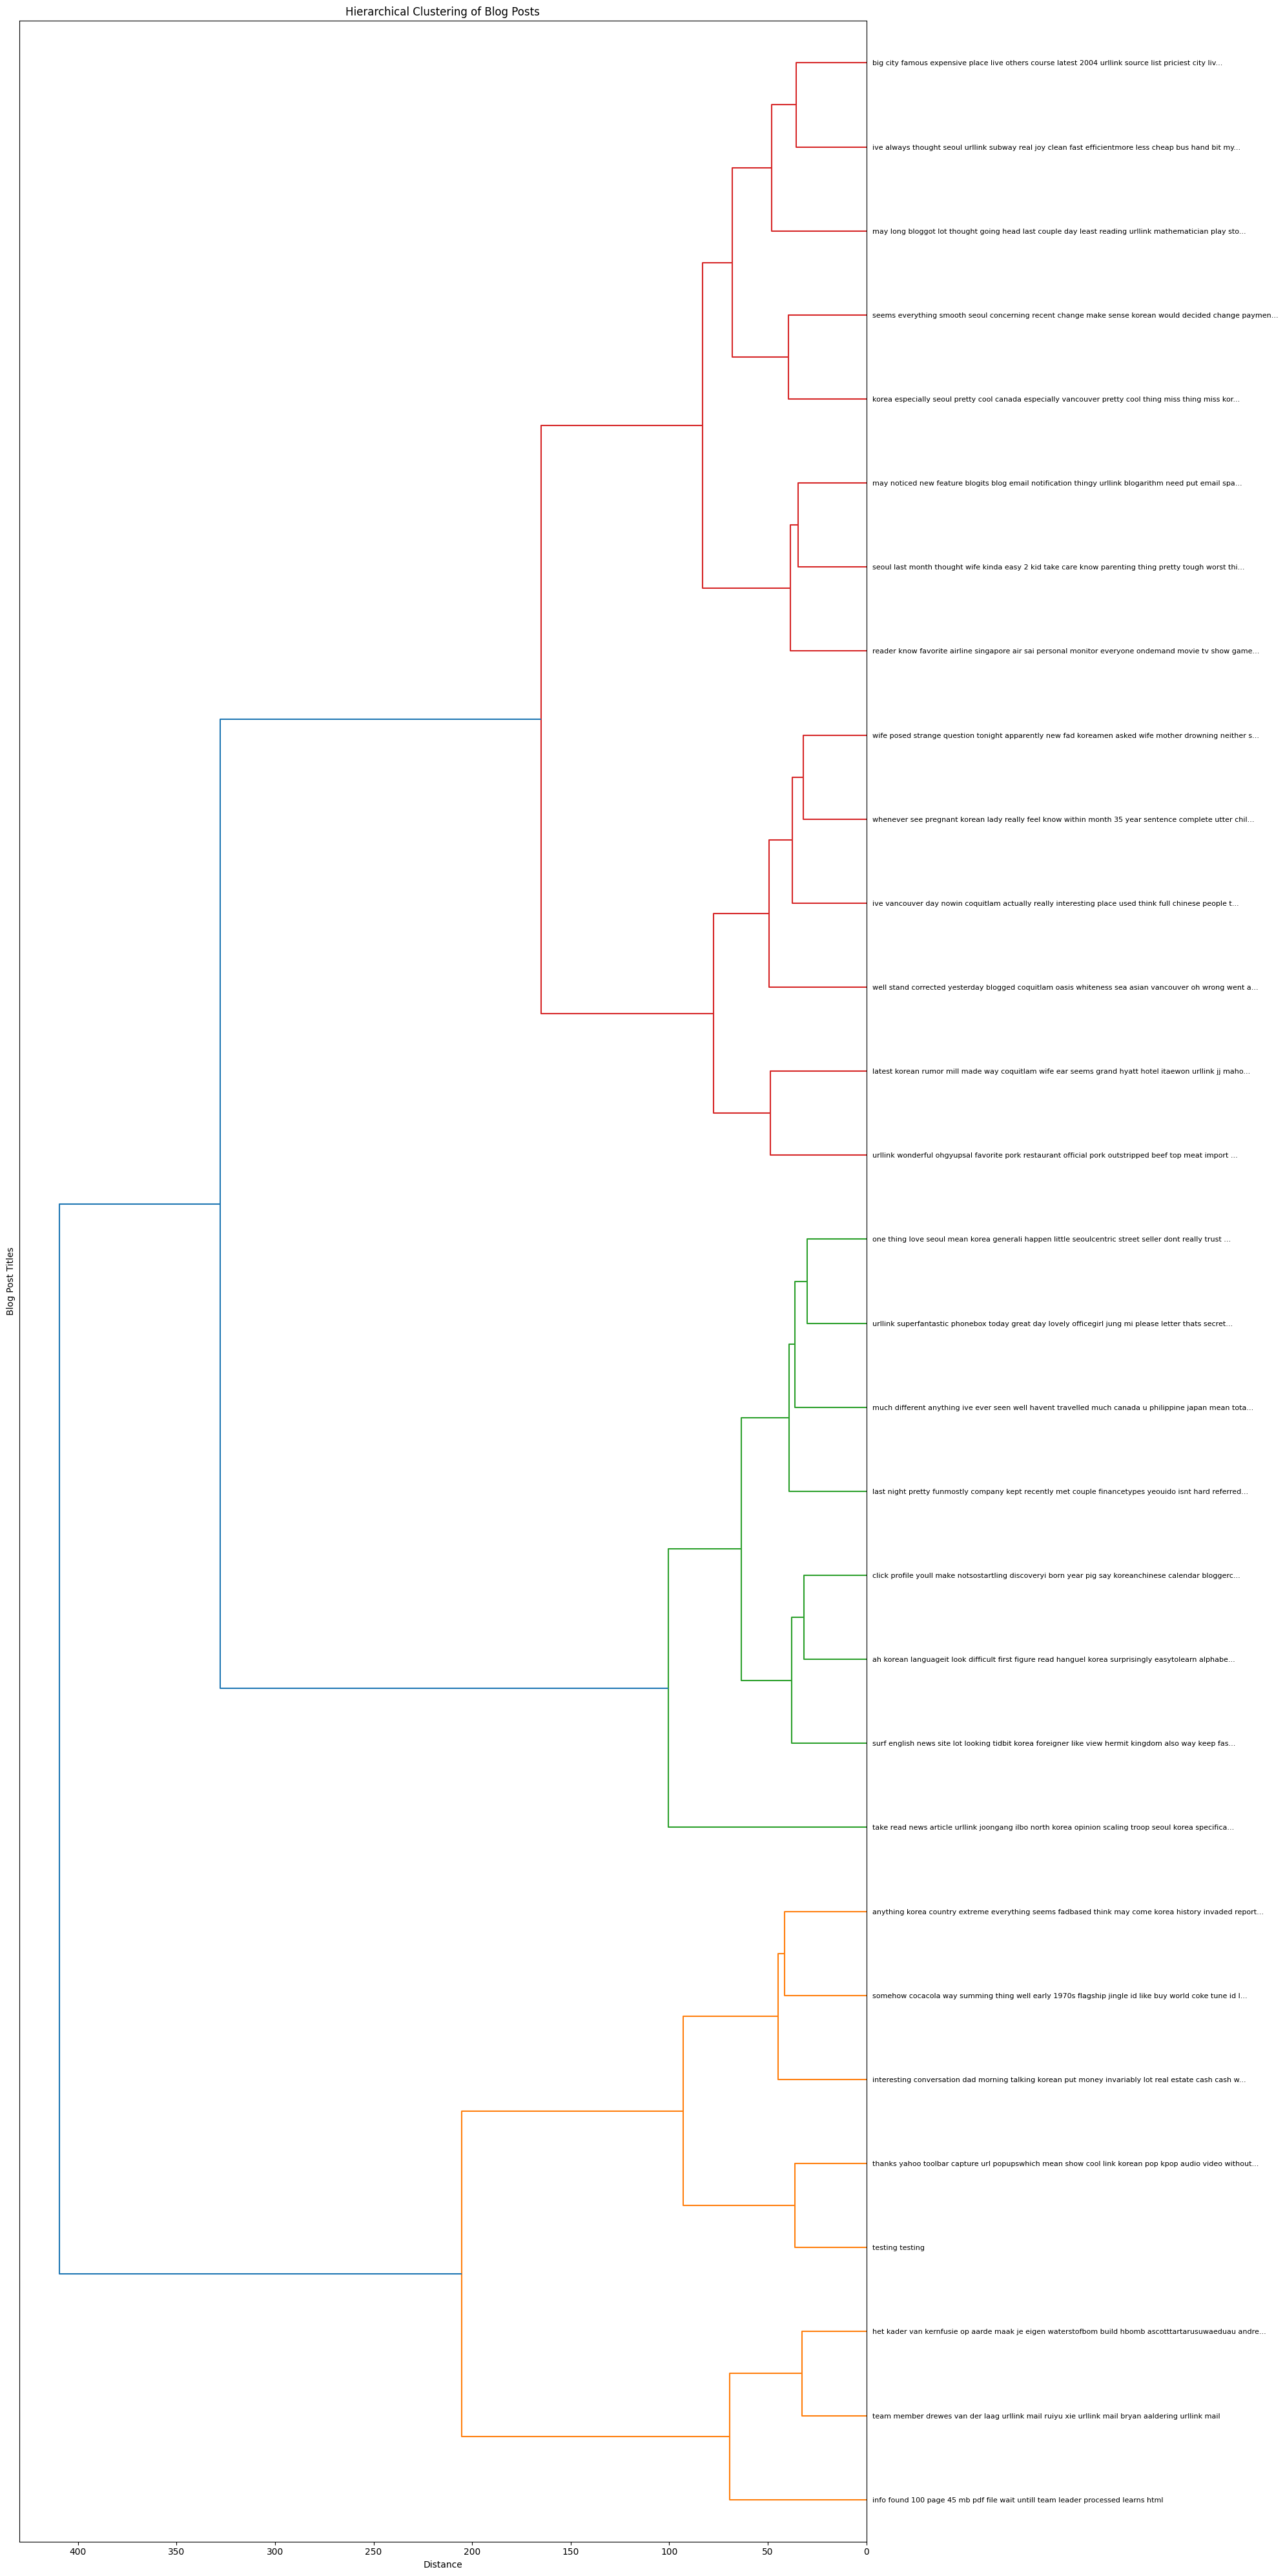

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_hierarchical_clusters(linkage_matrix, blog_data, p=30, figure_size=(20, 40)):
    # Set the figure size
    fig, ax = plt.subplots(figsize=figure_size)
    blog_titles = blog_data['processed_text'].values.tolist()

    # Truncate text to a reasonable length (e.g., 100 characters)
    blog_titles = [text[:100] + '...' if len(text) > 100 else text for text in blog_titles]

    # Plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=blog_titles,
                   truncate_mode='lastp', p=p, leaf_font_size=8, no_plot=True)

    temp = {R["leaves"][ii]: blog_titles[ii] for ii in range(len(R["leaves"]))}

    def llf(xx):
        return "{}".format(temp[xx])

    ax = dendrogram(linkage_matrix, truncate_mode='lastp', orientation='left', p=p,
                    leaf_label_func=llf, leaf_font_size=8, color_threshold=0.7 * max(linkage_matrix[:, 2]))
    plt.title("Hierarchical Clustering of Blog Posts")
    plt.xlabel("Distance")
    plt.ylabel("Blog Post Titles")
    plt.tight_layout()
    plt.show()

# Run the adjusted plot function
plot_hierarchical_clusters(linkage_matrix, data_clustering, p=30, figure_size=(20, 40))


Step 1: Cutting the Dendrogram to Form Clusters
We will choose a distance threshold to cut the dendrogram and form clusters.

Step 2: Assign Cluster Labels to Each Blog Post
We will assign cluster numbers to each data point.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Step 1: Extract cluster labels from the linkage matrix
max_d = 100  # you can adjust this value to get a different number of clusters
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# Step 2: Assign cluster labels to the original dataframe
data_clustering['hierarchical_cluster'] = clusters
print("Cluster labels assigned based on hierarchical clustering!")

# Display the distribution of clusters
from collections import Counter
print("Hierarchical Cluster Distribution:", Counter(clusters))

# Display a few rows to check the cluster labels
print(data_clustering[['text', 'hierarchical_cluster']].head())


Cluster labels assigned based on hierarchical clustering!
Hierarchical Cluster Distribution: Counter({np.int32(4): 2716, np.int32(6): 2580, np.int32(5): 1945, np.int32(2): 1333, np.int32(3): 1000, np.int32(1): 426})
                                                text  hierarchical_cluster
0             Info has been found (+/- 100 pages,...                     3
1             These are the team members:   Drewe...                     1
2             In het kader van kernfusie op aarde...                     5
3                   testing!!!  testing!!!                               3
4               Thanks to Yahoo!'s Toolbar I can ...                     2


Analyzing the Clusters

In [ ]:
# Extract top representative posts from each cluster
num_representative_posts = 5  # You can change this number to see more or fewer posts

for cluster_num in sorted(data_clustering['hierarchical_cluster'].unique()):
    representative_posts = data_clustering[data_clustering['hierarchical_cluster'] == cluster_num]['text'].head(num_representative_posts).tolist()
    print(f"CLUSTER #{cluster_num}")
    print("Representative Blog Posts:")
    for post in representative_posts:
        print(f"- {post[:300]}...")  # Displaying the first 300 characters of each post
    print("-" * 80)


CLUSTER #1
Representative Blog Posts:
-            These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          ...
-              Ah, the Korean language...it looks so difficult at first, then as you figure out how to read Hanguel (Korea's surprisingly easy-to-learn alphabet of 24 characters) it seems so easy. Then the vocabulary starts. Oh no. Then the backwards (to us) sentence structure.  Yikes!  Luckily there ...
-              Korea, especially Seoul, is pretty cool; and Canada, especially Vancouver is pretty cool too.  Here are a few things I will (and will not) miss:  Things to miss about Korea: being a celebrity (well, a little one, at least...just for being me); 100 kinds of ice cream at the local conveni...
-              Over the last few weeks I've been to a couple of Western movies ( urlLink Troy  and  urlLink Spiderman 2 ) and a few Korean ones as well:  urlLink ì

### Clustering Results and Interpretation

After applying clustering algorithms to the preprocessed blog data, we identified **six distinct clusters**, each capturing different themes and writing styles among bloggers. Below is a brief interpretation of each cluster based on representative blog posts:

- **Cluster 1: Personal Experiences Abroad (Korea)**  
  This cluster features personal narratives about living in or visiting Korea, reflecting on culture shocks, lifestyle, language learning, and daily experiences.

- **Cluster 2: Local Observations & News Commentary**  
  Posts in this cluster often comment on Korean current events, public services, or infrastructure, blending factual observations with personal reactions.

- **Cluster 3: Abstract & Creative Writing**  
  This cluster contains artistic, poetic, or humorous content — including surreal descriptions, short prose, or experimental writing styles.

- **Cluster 4: Emotional & Reflective Posts**  
  Blog posts here are introspective or sentimental, with themes of nostalgia, personal memories, emotional experiences, and philosophical reflections.

- **Cluster 5: Mixed Commentary & Humor**  
  A blend of casual humor, personal opinions, and cultural references (e.g., Korean pop culture, life in Vancouver). Posts often contain sarcasm, jokes, or rants.

- **Cluster 6: Cultural Comparison & Social Insights**  
  This cluster includes discussions comparing Korea with other countries, insights on societal behaviors, historical references, and economic commentary.


### Conclusion

This project successfully utilized **Natural Language Processing (NLP)** techniques to analyze the **Blog Authorship Corpus**, a dataset extracted from **Blogger.com**. By applying **clustering** and **classification algorithms**, we uncovered meaningful patterns in blog posts, highlighting the potential of machine learning for content categorization and demographic prediction.

Through the application of clustering techniques such as **KMeans**, **Affinity Propagation**, and **Hierarchical Clustering**, we effectively grouped blog posts into distinct clusters with thematic consistency. These results offer insights into the various writing styles and topics prevalent among different bloggers. The **Support Vector Machine (SVM)** model excelled in **gender classification**, with the highest performance and AUC of **0.89**, demonstrating its strong predictive power for demographic attributes.

The project’s findings emphasize the growing utility of machine learning models in handling unstructured textual data, providing automated solutions for **content organization**, **topic modeling**, and **demographic prediction**. However, future work could explore integrating advanced NLP techniques (e.g., **transformer models**), dimensionality reduction methods (e.g., **SentenceBERT**), and additional evaluation metrics to enhance scalability and the robustness of clustering and classification tasks.
